In [2]:
import io
import requests
import PyPDF2
import re
import spacy
import gensim
import wordcloud
import mlflow
import sklearn
import string
import pandas as pd
import json

In [3]:
def extract_content(url):
    try: 
        response = requests.get(url)
        open_pdf_file = io.BytesIO(response.content)
        pdf = PyPDF2.PdfReader(open_pdf_file)
        
        # Access pdf content 
        text = []
        for i in range(len(pdf.pages)):
            page = pdf.pages[i]
            text.append(page.extract_text())
        
        # Return concatenated content 
        return "\n".join(text)
    except Exception as e:
        print(f"Error occurred while processing {url}: {e}")
        return ""

In [4]:
"""
def clean_esg_report_urls(urls):
    cleaned_urls = []
    for url in set(urls):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                cleaned_urls.append(url)
        except:
            pass
    return cleaned_urls
cleaned_urls = clean_esg_report_urls(urls)
print(cleaned_urls)
"""

'\ndef clean_esg_report_urls(urls):\n    cleaned_urls = []\n    for url in set(urls):\n        try:\n            response = requests.get(url)\n            if response.status_code == 200:\n                cleaned_urls.append(url)\n        except:\n            pass\n    return cleaned_urls\ncleaned_urls = clean_esg_report_urls(urls)\nprint(cleaned_urls)\n'

In [5]:
"""esg_urls= { 'hsbc': 'https://www.hsbc.com/-/files/hsbc/our-approach/measuring-our-impact/pdfs/190408-esg-update-april-2019-eng.pdf',
            'td bank':'https://www.td.com/document/PDF/corporateresponsibility/2018-ESG-Report.pdf',
            'bank of america': 'https://about.bankofamerica.com/assets/pdf/Bank-of-America-2017-ESG-Performance-Data-Summary.pdf',
            'rbc': 'https://www.rbc.com/community-social-impact/_assets-custom/pdf/2019-ESG-Report.PDF',
            'macquarie': 'https://www.macquarie.com/assets/macq/investor/reports/2020/sections/Macquarie-Group-FY20-ESG.pdf',
            'lloyds': 'https://www.lloydsbankinggroup.com/globalassets/documents/investors/2020/2020feb20_lbg_esg_approach.pdf',
            'santander': 'https://www.santander.co.uk/assets/s3fs-public/documents/2019_santander_esg_supplement.pdf',
            'bluebay': 'https://www.bluebay.com/globalassets/documents/bluebay-annual-esg-investment-report-2018.pdf',
            'lasalle': 'https://www.lasalle.com/documents/ESG_Policy_2019.pdf',
            'riverstone': 'https://www.riverstonellc.com/media/1196/riverstone_esg_report.pdf',
            'aberdeen standard': 'https://www.standardlifeinvestments.com/RI_Report.pdf',
            'apollo': 'https://www.apollo.com/~/media/Files/A/Apollo-V2/documents/apollo-2018-esg-summary-annual-report.pdf',
            'bmogan': 'https://www.bmogam.com/gb-en/intermediary/wp-content/uploads/2019/02/cm16148-esg-profile-and-impact-report-2018_v33_digital.pdf',
            'vanguard': 'https://personal.vanguard.com/pdf/ISGESG.pdf',
            'ruffer': 'https://www.ruffer.co.uk/-/media/Ruffer-Website/Files/Downloads/ESG/2018_Ruffer_report_on_ESG.pdf',
            'northern trust': 'https://cdn.northerntrust.com/pws/nt/documents/fact-sheets/mutual-funds/institutional/annual-stewardship-report.pdf',
          }
          """

"esg_urls= { 'hsbc': 'https://www.hsbc.com/-/files/hsbc/our-approach/measuring-our-impact/pdfs/190408-esg-update-april-2019-eng.pdf',\n            'td bank':'https://www.td.com/document/PDF/corporateresponsibility/2018-ESG-Report.pdf',\n            'bank of america': 'https://about.bankofamerica.com/assets/pdf/Bank-of-America-2017-ESG-Performance-Data-Summary.pdf',\n            'rbc': 'https://www.rbc.com/community-social-impact/_assets-custom/pdf/2019-ESG-Report.PDF',\n            'macquarie': 'https://www.macquarie.com/assets/macq/investor/reports/2020/sections/Macquarie-Group-FY20-ESG.pdf',\n            'lloyds': 'https://www.lloydsbankinggroup.com/globalassets/documents/investors/2020/2020feb20_lbg_esg_approach.pdf',\n            'santander': 'https://www.santander.co.uk/assets/s3fs-public/documents/2019_santander_esg_supplement.pdf',\n            'bluebay': 'https://www.bluebay.com/globalassets/documents/bluebay-annual-esg-investment-report-2018.pdf',\n            'lasalle': 'http

In [6]:
esg_urls={ 
  'barclays': 'https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_BARC_2021.pdf',
  'jp morgan chase': 'https://www.jpmorgan.com/content/dam/jpmc/jpmorgan-chase-and-co/documents/jpmc-esg-report-2021.pdf',
  'BNP Paribas': 'https://cdn-group.bnpparibas.com/uploads/file/bnpp_climateanalytics_alignmentreport_final.pdf',
  'goldman sachs': 'https://www.goldmansachs.com/a/2021-sustainability-report.pdf',
  'hsbc': 'https://www.hsbc.com/-/files/hsbc/investors/hsbc-results/2021/annual/pdfs/hsbc-holdings-plc/220222-esg-review-2021.pdf',
  'PNC':'https://www.pnc.com/content/dam/pnc-com/pdf/aboutpnc/CorporateResponsibilityReports/PNC_Corporate_Responsibility_Report_2021.pdf',
  'bank of america': 'https://about.bankofamerica.com/content/dam/about/pdfs/ESG_GHI_2021_508_secured.pdf',
  'rbc': 'https://www.rbc.com/community-social-impact/_assets-custom/pdf/2021-ESG-Report.PDF',
  'macquarie': 'https://www.macquarie.com/assets/macq/investor/reports/2021/sections/macquarie-group-fy21-esg.pdf',
  'lloyds': 'https://assets.lloyds.com/media/8c362b67-e4a5-4876-927f-397c10491d72/Lloyds_ESG%202021_report_final.pdf',
  'santander': 'https://www.santander.com/content/dam/santander-com/en/contenido-paginas/nuestro-compromiso/reports/doc-informe-BR-polonia-2021.pdf',
  'bluebay': 'https://www.rbcbluebay.com/globalassets/documents/bluebay-esg-investment-update-june-2021.pdf',
  'riverstone': 'https://www.riverstonellc.com/media/1328/riverstone-esg-report-2021_updated.pdf',
  'aberdeen standard': 'https://www.abrdn.com/docs?documentId=GB-080322-167278-5',
  'apollo': 'https://www.apollo.com/~/media/Files/A/Apollo-V3/documents/apollo-2021-esg-report-final.pdf',
  'vanguard': 'https://www.nl.vanguard/content/dam/intl/europe/documents/en/climate-change-tcfd-report_en-eu.pdf',
  'ruffer': 'https://www.ruffer.co.uk/-/media/ruffer-website/files/downloads/cat/2021-cat-responsible-investment-report.pdf?la=en&hash=2EB1AE3E432C88D6E51015A3079A5D09',
  

         }
# Prepare PDF into Dataframe
esg_urls_pd = pd.DataFrame(list(esg_urls.items()), columns=['company', 'url'])

esg_urls = pd.DataFrame(esg_urls_pd)

In [7]:
esg_urls

,company,url
0,barclays,https://www.responsibilityreports.com/HostedDa...
1,jp morgan chase,https://www.jpmorgan.com/content/dam/jpmc/jpmo...
2,BNP Paribas,https://cdn-group.bnpparibas.com/uploads/file/...
3,goldman sachs,https://www.goldmansachs.com/a/2021-sustainabi...
4,hsbc,https://www.hsbc.com/-/files/hsbc/investors/hs...
5,PNC,https://www.pnc.com/content/dam/pnc-com/pdf/ab...
6,bank of america,https://about.bankofamerica.com/content/dam/ab...
7,rbc,https://www.rbc.com/community-social-impact/_a...
8,macquarie,https://www.macquarie.com/assets/macq/investor...
9,lloyds,https://assets.lloyds.com/media/8c362b67-e4a5-...


In [8]:
# add a new column to the data frame esg_urls_pd with the name 'content'

esg_urls_pd['content'] = esg_urls_pd['url'].apply(extract_content)
esg_articles = esg_urls_pd[esg_urls_pd['content'].str.len() > 0] # that only includes rows with non-empty content

Error occurred while processing https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_BARC_2021.pdf: EOF marker not found
Error occurred while processing https://www.pnc.com/content/dam/pnc-com/pdf/aboutpnc/CorporateResponsibilityReports/PNC_Corporate_Responsibility_Report_2021.pdf: EOF marker not found
Error occurred while processing https://about.bankofamerica.com/content/dam/about/pdfs/ESG_GHI_2021_508_secured.pdf: PyCryptodome is required for AES algorithm
Error occurred while processing https://www.rbcbluebay.com/globalassets/documents/bluebay-esg-investment-update-june-2021.pdf: EOF marker not found
Error occurred while processing https://www.apollo.com/~/media/Files/A/Apollo-V3/documents/apollo-2021-esg-report-final.pdf: EOF marker not found


In [9]:
esg_articles

,company,url,content
1,jp morgan chase,https://www.jpmorgan.com/content/dam/jpmc/jpmo...,2021 \nENVIRONMENTAL \nSOCIAL & \nGOVERNAN...
2,BNP Paribas,https://cdn-group.bnpparibas.com/uploads/file/...,1\nBNP PARIBAS / CLIMATE ANALYTICS AND ALIGNM...
3,goldman sachs,https://www.goldmansachs.com/a/2021-sustainabi...,Progress \nThrough \nPerformanceSUSTAINABILITY...
4,hsbc,https://www.hsbc.com/-/files/hsbc/investors/hs...,"Environmental, social \nand governance review\..."
7,rbc,https://www.rbc.com/community-social-impact/_a...,HNW_NRG_B_Bleed_NoMask\nRoyal Bank of Canada\n...
8,macquarie,https://www.macquarie.com/assets/macq/investor...,"52\nEnvironmental, Social and Governance\nMacq..."
9,lloyds,https://assets.lloyds.com/media/8c362b67-e4a5-...,"Environmental, Social \nand Governance \nRepor..."
10,santander,https://www.santander.com/content/dam/santande...,ESG Report 2021\nLooking to the future\nRespon...
12,riverstone,https://www.riverstonellc.com/media/1328/river...,Investing \nResponsibly\nRiverstone ESG Repor...
13,aberdeen standard,https://www.abrdn.com/docs?documentId=GB-08032...,The Power \nof Investment\nSustainability Rep...


In [10]:
def remove_non_ascii(text):
    """
    Removes non-ASCII characters from the given text
    """
    printable = set(string.printable)
    return ''.join(filter(lambda x: x in printable, text)) 
#The filter() function is then used with a lambda function to iterate over each character in the input text and keep only those characters that are present in the printable set. 
#join() method to concatenate the filtered characters back into a single string, effectively removing any non-ASCII characters.

In [11]:
def not_header(line):
                                           # as we're consolidating broken lines into paragraphs, we want to make sure not to include headers
  return not line.isupper()

In [12]:
nlp = spacy.load('en_core_web_sm')

#When you load the 'en_core_web_sm' model using the spacy.load() function, you are essentially loading a trained NLP model into your Python code, which can then be used to process text data and perform various NLP tasks. Once the model is loaded, you can use its functionalities, such as tokenization, sentence segmentation, entity recognition, and more, to analyze and extract information from text data in English.

In [13]:
def extract_statements(nlp, text):
    """
    Extracts ESG statements from raw text by removing junk, URLs, etc.
    Groups consecutive lines into paragraphs and uses Spacy to parse sentences.
    """
    # remove non ASCII characters
    text = remove_non_ascii(text)

    lines = []
    prev = ""
    for line in text.split('\n'):
        # aggregate consecutive lines where text may be broken down
        # only if next line starts with a space or previous does not end with dot.
        if(line.startswith(' ') or not prev.endswith('.')):
            prev = prev + ' ' + line
        else:
            # new paragraph
            lines.append(prev)
            prev = line

    # don't forget left-over paragraph
    lines.append(prev)

    # clean paragraphs from extra space, unwanted characters, urls, etc.
    # best effort clean up, consider a more versatile cleaner
    sentences = []
    for line in lines:

        # removing header number
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub('\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)://)?[a-zA-Z0-9./?:@-=#]+.([a-zA-Z]){2,6}([a-zA-Z0-9.&/?:@-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub('\s+', ' ', line)

        # split paragraphs into well defined sentences using Spacy
        for part in list(nlp(line).sents):
            sentences.append(str(part).strip())

    return sentences

In [14]:
esg_articles = esg_urls.copy()
esg_articles['content'] = esg_articles['url'].apply(lambda url: extract_content(url))
esg_articles = esg_articles[esg_articles['content'].str.len() > 0] 

Error occurred while processing https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_BARC_2021.pdf: EOF marker not found
Error occurred while processing https://www.pnc.com/content/dam/pnc-com/pdf/aboutpnc/CorporateResponsibilityReports/PNC_Corporate_Responsibility_Report_2021.pdf: EOF marker not found
Error occurred while processing https://about.bankofamerica.com/content/dam/about/pdfs/ESG_GHI_2021_508_secured.pdf: PyCryptodome is required for AES algorithm
Error occurred while processing https://www.rbcbluebay.com/globalassets/documents/bluebay-esg-investment-update-june-2021.pdf: EOF marker not found
Error occurred while processing https://www.apollo.com/~/media/Files/A/Apollo-V3/documents/apollo-2021-esg-report-final.pdf: EOF marker not found


In [15]:
esg_articles

,company,url,content
1,jp morgan chase,https://www.jpmorgan.com/content/dam/jpmc/jpmo...,2021 \nENVIRONMENTAL \nSOCIAL & \nGOVERNAN...
2,BNP Paribas,https://cdn-group.bnpparibas.com/uploads/file/...,1\nBNP PARIBAS / CLIMATE ANALYTICS AND ALIGNM...
3,goldman sachs,https://www.goldmansachs.com/a/2021-sustainabi...,Progress \nThrough \nPerformanceSUSTAINABILITY...
4,hsbc,https://www.hsbc.com/-/files/hsbc/investors/hs...,"Environmental, social \nand governance review\..."
7,rbc,https://www.rbc.com/community-social-impact/_a...,HNW_NRG_B_Bleed_NoMask\nRoyal Bank of Canada\n...
8,macquarie,https://www.macquarie.com/assets/macq/investor...,"52\nEnvironmental, Social and Governance\nMacq..."
9,lloyds,https://assets.lloyds.com/media/8c362b67-e4a5-...,"Environmental, Social \nand Governance \nRepor..."
10,santander,https://www.santander.com/content/dam/santande...,ESG Report 2021\nLooking to the future\nRespon...
12,riverstone,https://www.riverstonellc.com/media/1328/river...,Investing \nResponsibly\nRiverstone ESG Repor...
13,aberdeen standard,https://www.abrdn.com/docs?documentId=GB-08032...,The Power \nof Investment\nSustainability Rep...


In [16]:
def extract_statements_udf(content_series, nlp):

    statements = []
    for content in content_series:
        # remove non ASCII characters
        text = remove_non_ascii(content)

        # split into paragraphs and sentences
        lines = []
        prev = ""
        for line in text.split('\n'):
            if(line.startswith(' ') or not prev.endswith('.')):
                prev = prev + ' ' + line
            else:
                lines.append(prev)
                prev = line
        lines.append(prev)

        # clean paragraphs from extra space, unwanted characters, urls, etc.
        # best effort clean up, consider a more versatile cleaner
        for line in lines:
            line = re.sub(r'^\s?\d+(.*)$', r'\1', line)  # removing header number
            line = line.strip()  # removing trailing spaces
            line = re.sub('\s?-\s?', '-', line)  # words may be split between lines, ensure we link them back together
            line = re.sub(r'\s?([,:;.])', r'\1', line)  # remove space prior to punctuation
            line = re.sub(r'\d{5,}', r' ', line)  # remove numbers with more than 5 digits
            line = re.sub(r'((http|https)://)?[-a-zA-Z0-9./?:@=#]+\\.([a-zA-Z]){2,6}([a-zA-Z0-9.&/?:@-_=#])*', r' ', line)
            line = re.sub('\s+', ' ', line)  # remove multiple spaces

            # split paragraphs into sentences using spacy
            for part in list(nlp(line).sents):
                sentence = str(part).strip()
                if len(sentence) > 100:  # filter out short sentences
                    statements.append(sentence)

    return statements

In [17]:
tmp = pd.DataFrame(columns=["company", "statements"])
for company, content in esg_articles[["company", "content"]].values:
    statements = extract_statements_udf(content_series=pd.Series([content]), nlp=nlp)
    tmp = tmp.append({"company": company, "statements": statements}, ignore_index=True)

esg_statements = tmp.explode(column="statements").reset_index(drop=True)

In [18]:
esg_statements

,company,statements
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...
1,jp morgan chase,Feature: Our Commitment to Racial Equity 21Div...
2,jp morgan chase,It has also shown what companies like ours can...
3,jp morgan chase,"Throughout this period of uncertainty, JPMorga..."
4,jp morgan chase,We are leveraging capital and expertise across...
...,...,...
8614,ruffer,This financial promotion is issued by Ruffer L...
8615,ruffer,"Although Ruffer LLPs information providers, in..."
8616,ruffer,None of the ESG Parties makes any express or i...
8617,ruffer,None of the ESG Parties shall have any liabili...


In [19]:
esg_statements.to_csv('esg_statements.txt', sep='\t', index=False, header=False)


In [20]:
def lemmatize(text):
    # Parse text using spacy
    doc = nlp(text)

    # Convert words into their simplest form (singular, present form, etc.)
    lemma = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            lemma.append(token.lemma_)
    return ' '.join(lemma)



#This version of the function uses token.lemma_ instead of token.lemma to access the lemmatized form of the token, and returns a string instead of a tokenized string.


In [21]:
def tokenize(sentence):
    gen = gensim.utils.simple_preprocess(sentence, deacc=True) #performs basic text preprocessing, including lowercasing, tokenization, and removing punctuation marks
    return ' '.join(gen)

In [22]:

# Apply the lemmatize function to each statement in the DataFrame
esg_statements['lemma'] = esg_statements['statements'].apply(lemmatize)

# Select only the columns we want to keep
esg_lemma = esg_statements[['company', 'statements', 'lemma']]


In [23]:
esg_lemma

,company,statements,lemma
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...
1,jp morgan chase,Feature: Our Commitment to Racial Equity 21Div...,feature : our commitment to Racial Equity 21Di...
2,jp morgan chase,It has also shown what companies like ours can...,it have also show what company like our can an...
3,jp morgan chase,"Throughout this period of uncertainty, JPMorga...","throughout this period of uncertainty , JPMorg..."
4,jp morgan chase,We are leveraging capital and expertise across...,we be leverage capital and expertise across ou...
...,...,...,...
8614,ruffer,This financial promotion is issued by Ruffer L...,this financial promotion be issue by Ruffer LL...
8615,ruffer,"Although Ruffer LLPs information providers, in...","although ruffer llp information provider , inc..."
8616,ruffer,None of the ESG Parties makes any express or i...,none of the ESG Parties make any express or im...
8617,ruffer,None of the ESG Parties shall have any liabili...,none of the ESG Parties shall have any liabili...


In [24]:
esg_lemma.to_csv('esg_lemma.txt', sep='\t', index=False, header=False)


In [25]:
def remove_stop_words_and_company_names(lemma, company_name):
    # Parse lemma using spacy
    doc = nlp(lemma)
    extra=['plc', 'group', 'target',
           'track', 'capital', 'holding',
           'report', 'annualreport',
           'esg', 'bank', 'report',
           'annualreport', 'long', 'make','2021 tcfd','2020 2021','https www',
          ]
    # Create a list of stop words and company names
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    company_name_tokens = company_name.split()                               # tokenize the company name
    stop_words.update(company_name_tokens)
    stop_words.update(extra)


    # Remove stop words and company names from the lemma
    filtered_tokens = []
    for token in doc:
        if token.text.lower() not in stop_words:
            filtered_tokens.append(token.text)

    # Join the filtered tokens back into a string
    filtered_lemma = ' '.join(filtered_tokens)
    return filtered_lemma

In [26]:
# Apply the remove_stop_words_and_company_names() function to 'lemma' column in 'esg_statements' DataFrame
esg_statements['lemma'] = esg_statements.apply(lambda row: remove_stop_words_and_company_names(row['lemma'],
                                                                                               row['company']), axis=1)
esg_lemmatized=esg_statements[['company', 'statements', 'lemma']]

In [27]:
esg_lemmatized

,company,statements,lemma
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...
1,jp morgan chase,Feature: Our Commitment to Racial Equity 21Div...,feature : commitment Racial Equity 21Diversity...
2,jp morgan chase,It has also shown what companies like ours can...,"company like serve customer , client community..."
3,jp morgan chase,"Throughout this period of uncertainty, JPMorga...","period uncertainty , JPMorgan lead tireless fo..."
4,jp morgan chase,We are leveraging capital and expertise across...,leverage expertise company support green futur...
...,...,...,...
8614,ruffer,This financial promotion is issued by Ruffer L...,"financial promotion issue LLP , authorise regu..."
8615,ruffer,"Although Ruffer LLPs information providers, in...","llp information provider , include limitation ..."
8616,ruffer,None of the ESG Parties makes any express or i...,"Parties express imply warranty kind , Parties ..."
8617,ruffer,None of the ESG Parties shall have any liabili...,Parties shall liability error omission connect...


In [28]:
esg_lemmatized.to_csv('esg_lemmatized.txt', sep='\t', index=False, header=False)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stop words
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


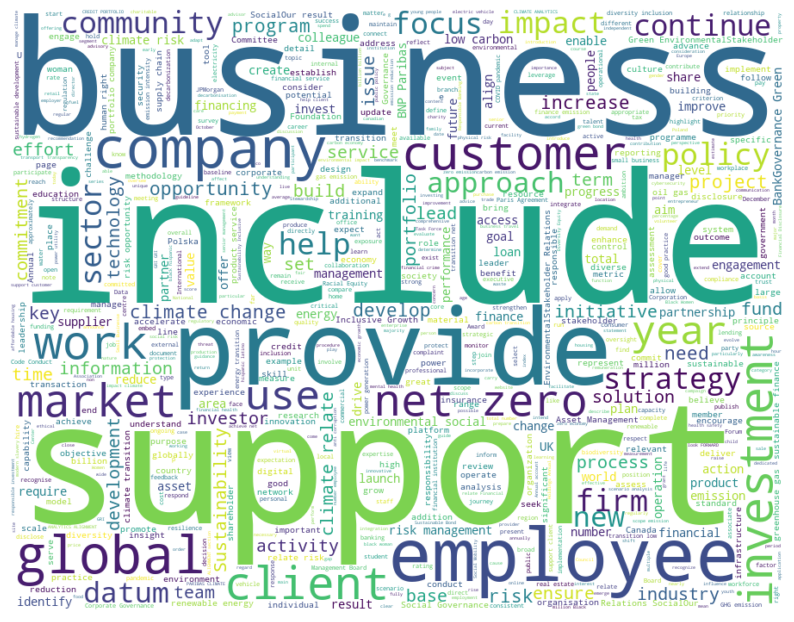

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


large_string = ' '.join(esg_lemmatized.lemma)

# use 3rd party lib to compute term freq., apply stop words
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=900, 
    height=700, 
    stopwords=stop_words, 
    contour_width=3, 
    contour_color='steelblue'
)

# display our wordcloud across all records
plt.figure(figsize=(10,10))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [43]:
# Run bi-gram TF-IDF frequencies
bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(2,2), min_df=10, use_idf=True)
bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(esg_lemmatized['lemma'])


In [44]:
bigram_tf_idf

<8619x915 sparse matrix of type '<class 'numpy.float64'>'
	with 20291 stored elements in Compressed Sparse Row format>

In [45]:
#display bigram_tf_idf 
# Convert bigram_tf_idf to dense matrix
dense_matrix = bigram_tf_idf.todense()

# Print dense matrix
print(dense_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

words = list(bigram_tf_idf_vectorizer.vocabulary_.keys())

# extract our top 10 ngrams
total_counts = np.zeros(len(words))
for t in bigram_tf_idf:
    total_counts += t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]     #sliced using [0:10] to select only the top 10 entries with the highest total counts.
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words)) 



In [47]:
words

['2020 2030',
 'impact operation',
 'credit risk',
 'zero banking',
 'banking alliance',
 'executive officer',
 'activity include',
 'zero economy',
 'sustainable financing',
 'service offer']

In [48]:
total_counts

array([  7.81735412,  16.24923375,   4.95491583,  22.87361954,
        12.34835814,   6.00363168,   9.18792668,   6.66461023,
         7.00944618,  14.56142403,  43.46319457,  32.48331436,
         2.49554665,   4.4824361 ,   7.02425478,   6.52218291,
         9.91410868,  12.80158637,   4.16695024,   6.96690964,
        15.1745754 ,   3.38665915,  15.48309899,  15.09702069,
        16.18260799,   4.4546047 ,  10.33821925,   6.67552413,
         7.12515671,  14.99924329,   6.3453436 ,  12.33556378,
         3.13238929,   6.28666107,  26.20832847,  13.14354638,
        10.13521638,   9.18826023,   4.72417472,   4.66031225,
         5.56791862,   4.59356528,   2.92640788,  13.4002194 ,
         7.75976722,   6.23205488,   6.39181404,   6.14604273,
        13.65466503,   8.55238412,   6.97505725,   6.21758195,
         4.20339804,  10.02813152,   5.56953422,   6.34186844,
        11.08243902,   5.15070116,   6.78099007,   7.33175662,
         6.3185848 ,   7.23956687,  16.36895322,   3.21

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

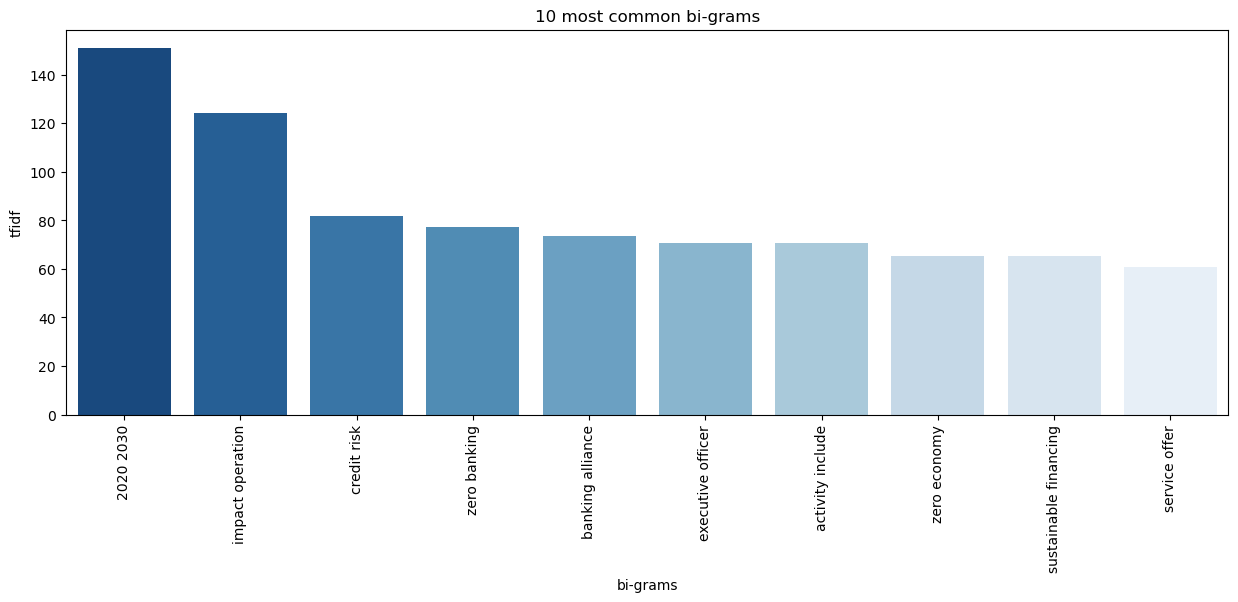

In [50]:
# Plot top 10 ngrams
plt.figure(figsize=(15, 5))
plt.subplot(title='10 most common bi-grams')
sns.barplot(x=words, y=counts, palette='Blues_r')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('bi-grams')
plt.ylabel('tfidf')
plt.show()

In [51]:
from sklearn.decomposition import LatentDirichletAllocation as LDA


In [52]:
#mlflow.end_run()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

#Topic modelling
word_tf_vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))  #counting the number of occurrences of each word in each document.
word_tf = word_tf_vectorizer.fit_transform(esg_lemmatized.lemma)
# serialize stopwords 
json_data = json.dumps([a for a in stop_words], indent=2)
f = open("C:\\Users\\User\\ESG\\stopwords.json", "w")
f.write(json_data)
f.close()
  
# track experiment on MLflow
with mlflow.start_run(run_name='topic_modelling'): #how many args could we pass ?
  
  # Train a LDA model with 9 topics
  lda = LDA(random_state = 42, n_components = 9, learning_decay = .3)
  lda.fit(word_tf) # trains the LDA model on the word frequency matrix word_tf.

2023/05/15 14:49:10 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [54]:
  # Log model 
  mlflow.sklearn.log_model(lda, "model")
  mlflow.log_param('n_components', '9')
  mlflow.log_param('learning_decay', '.3')
  mlflow.log_metric('perplexity', lda.perplexity(word_tf))
  mlflow.log_artifact("C:\\Users\\User\\ESG\\stopwords.json")
  

2023/05/15 14:50:37 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
C:\Users\User\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [55]:
  # retrieve run ID to attach topic name later
  lda_run_id = mlflow.active_run().info.run_id

In [56]:
# Retrieve top N words describing each of our 9 topics
"""def top_words(model, feature_names, n_top_words):
  rows = []
  for topic_idx, topic in enumerate(model.components_):
    message = ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    rows.append(["Topic #%d: " % (topic_idx + 1), message])
  return pd.DataFrame(rows, columns=['topic', 'keywords'])
  """
def top_words(model, feature_names, n_top_words):
    topics_words = []
    for topic_idx, topic in enumerate(model.components_):
        
        words = []
        for i in topic.argsort()[:-n_top_words-1:-1]:
            if len(feature_names[i]) > 1:
                words.append(feature_names[i])
            else:
                words.append('')
            
        topics_words.append(words)
        df = pd.DataFrame(topics_words)
    return df



In [57]:
# Display topics keywords for inspection and for us to label topics
"""
tf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tf_feature_names = tf_vectorizer.get_feature_names()
display(top_words(lda, tf_feature_names, 15))
"""
# Vectorize words using TF-IDF Vectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tf_vectorizer.fit(esg_lemmatized.lemma)
tf_feature_names = tf_vectorizer.get_feature_names_out()
display(top_words(lda, tf_feature_names, 15))




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,energy,green,2021,project,sustainability,bond,social,sustainable,renewable,include,million,company,provide,finance,issuance
1,client,customer,need,solution,provide,market,use,product,service,continue,new,energy,work,support,experience
2,scenario,risk,increase,term,high,analysis,supply,2021,use,customer,water,chain,company,low,sector
3,asset,management,net,customer,banking,zero,2021,financial,global,page,annual,include,agreement,manage,code
4,community,employee,support,2021,people,business,help,inclusive,diversity,growth,program,woman,black,year,000
5,2021,emission,gas,scope,result,number,total,2020,green,oil,relations,finance,sector,socialour,environmentalstakeholder
6,climate,investment,transition,carbon,company,zero,net,change,portfolio,support,client,risk,global,relate,sustainable
7,risk,management,policy,governance,include,board,environmental,climate,business,corporate,social,information,committee,conduct,process
8,work,development,continue,support,colleague,sustainable,business,industry,financial,new,world,customer,employee,datum,develop


In [58]:
#Define topic names
# We estimated our topics to be described around the following themes

"""topic_names = [
    'Sustainability and Risk Management',
    'Climate Change and Corporate Responsibility',
    'Responsible Investing and Financial Reporting',
    'Customer Focus and Corporate Governance',
    'Sustainable Finance and Investment Products',
    'Corporate Governance and Environmental Reporting',
    'Diversity and Inclusion in Business',
    'Waste Reduction',
    'Green Energy '
]
"""
topic_names = [
  'value employees',
  'strong governance', 
  'company transformation',
  'ethical investments',
  'sustainable finance',
  'support community',
  'focus customer',
  'code of conduct',
  'green energy'
]



In [59]:
# serialize topic names
json_data = json.dumps(topic_names, indent=2)
f = open("C:\\Users\\User\\ESG\\topics.json", "w")
f.write(json_data)
f.close()

In [60]:
# attach topics name to LDA model on mlflow
# we do not wish to re-open run_id and therefore alter start / end time
# instead, we log artifact to existing run
client = mlflow.tracking.MlflowClient()
client.log_artifact(lda_run_id, "C:\\Users\\User\\ESG\\topics.json")

In [61]:
from wordcloud import WordCloud

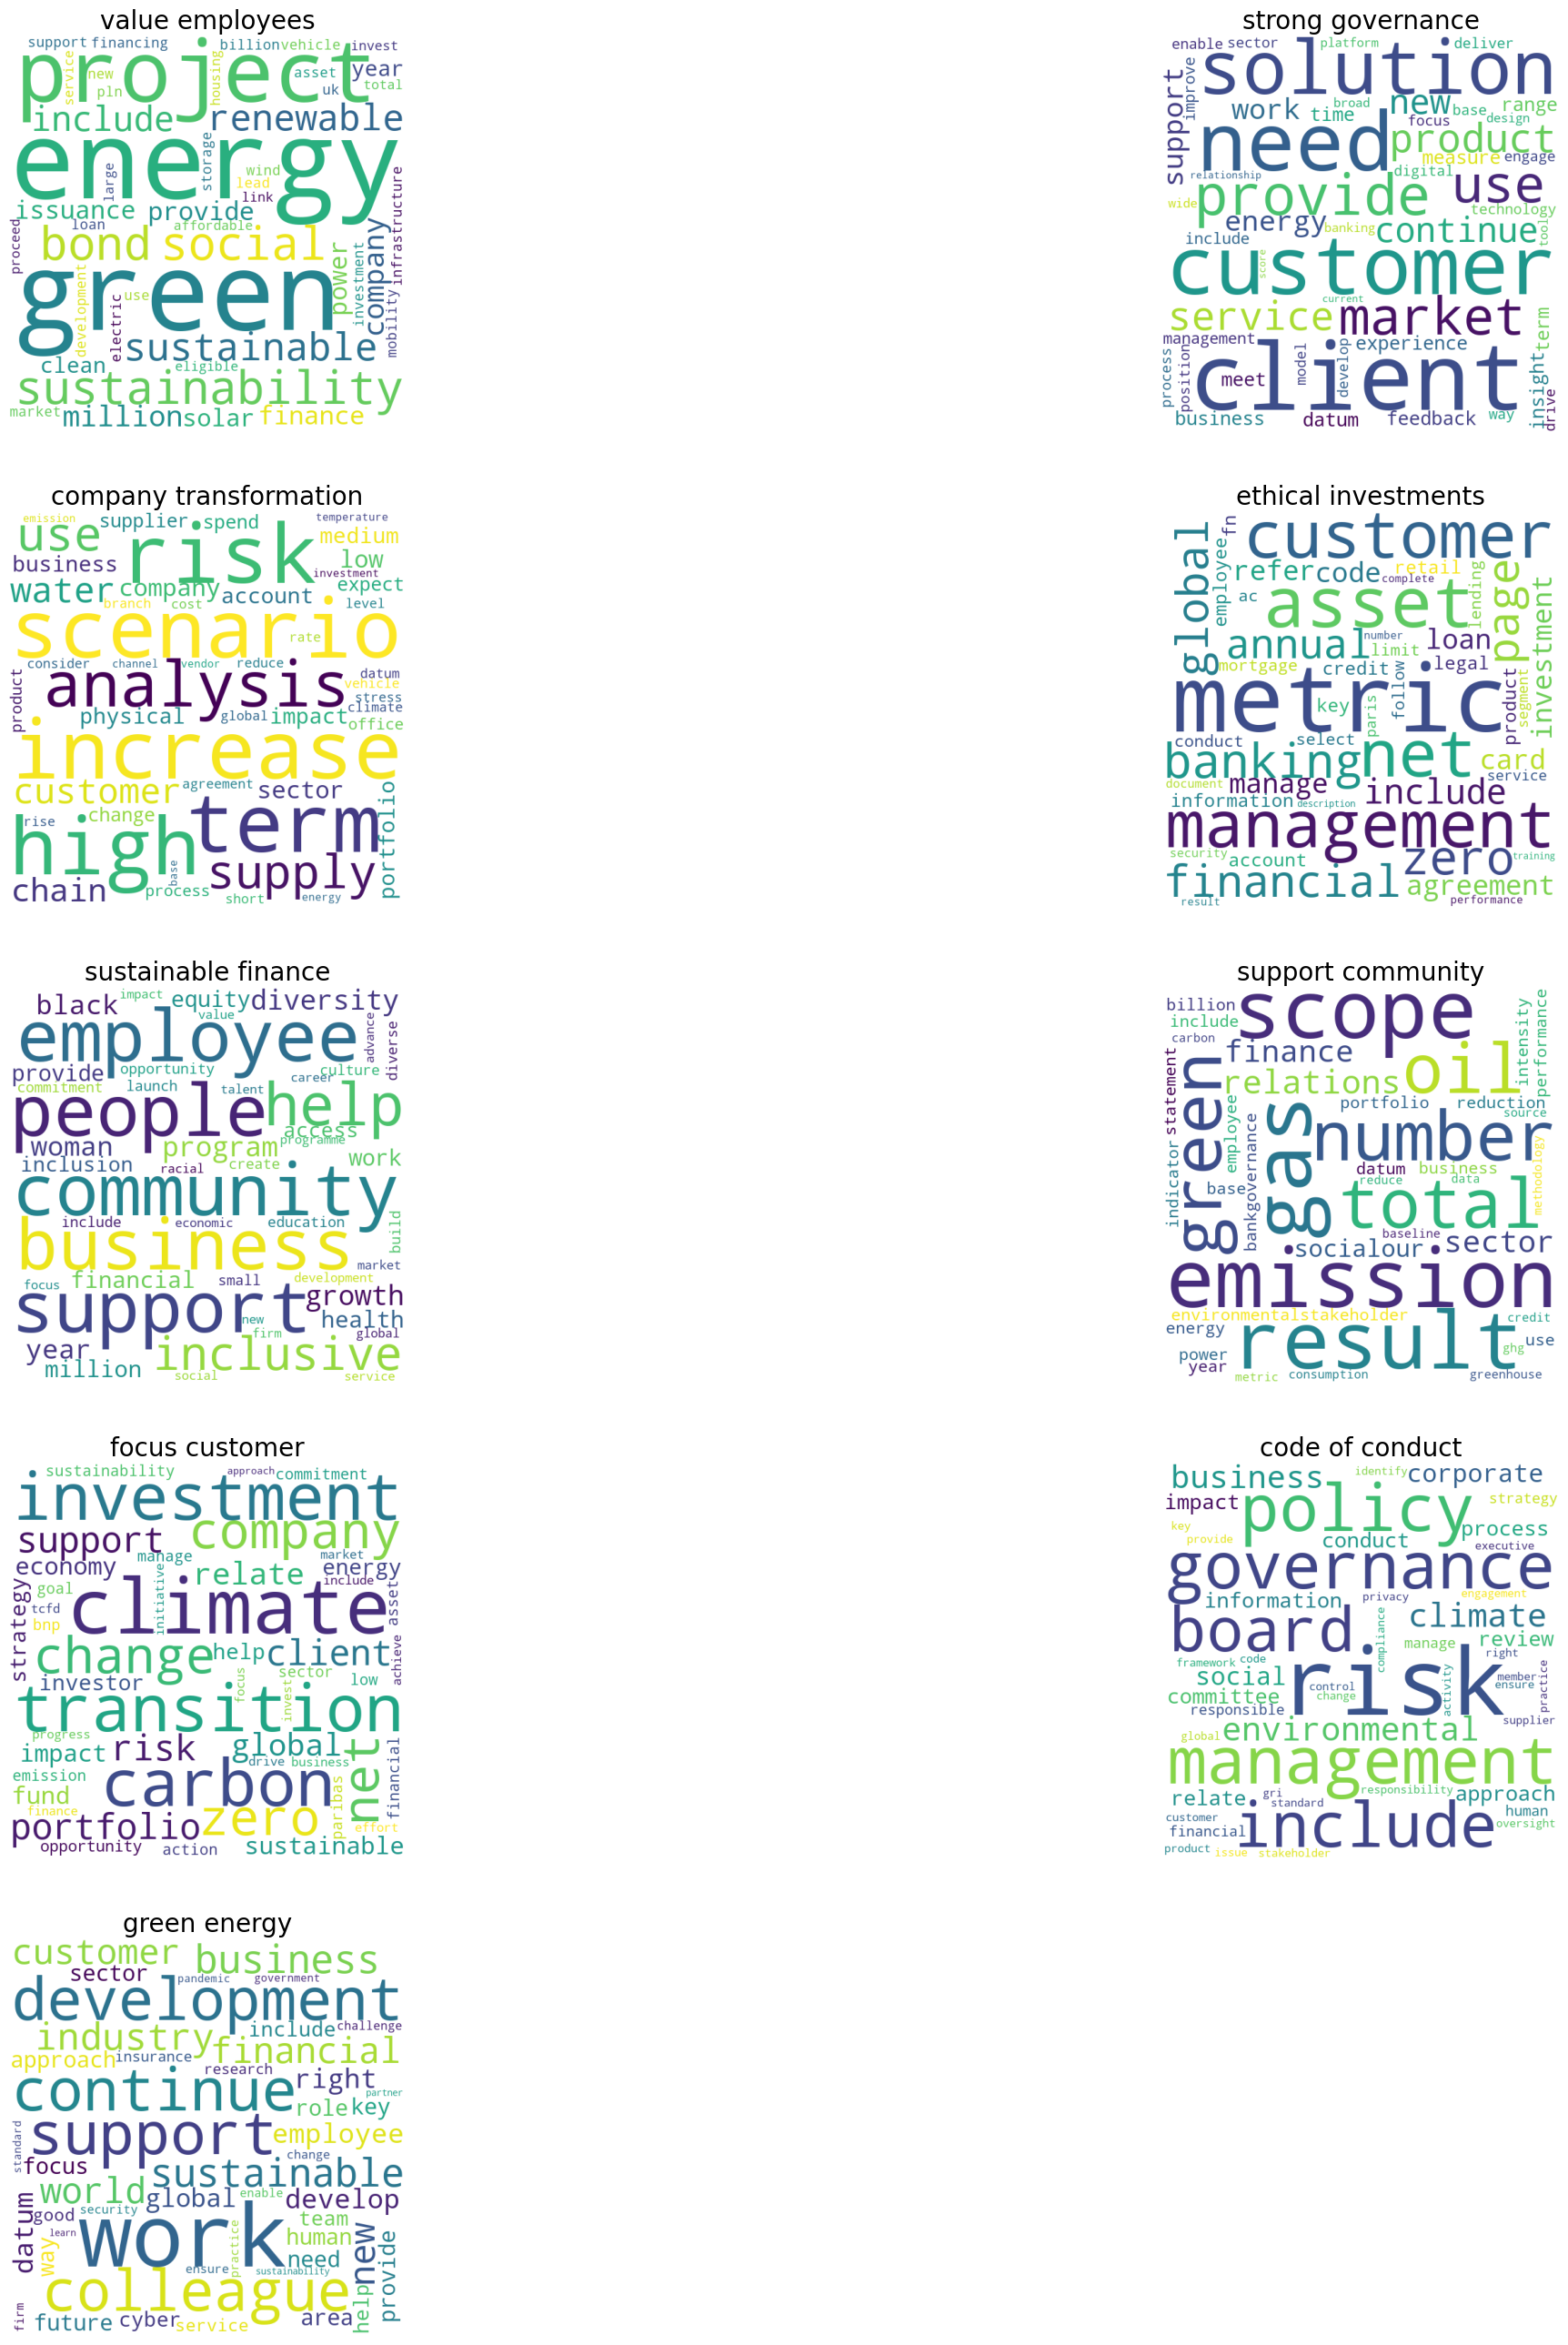

In [62]:
#Display topics
# We ensure relevance of our topics using simple wordcloud visualisation

def word_cloud(model, tf_feature_names, index):
    
    imp_words_topic=""
    comp = model.components_[index]
    vocab_comp = zip(tf_feature_names, comp)
    sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse=True)[:50]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]
    
    return WordCloud(
        background_color="white",
        width=600, 
        height=600, 
        contour_width=3, 
        contour_color='steelblue'
    ).generate(imp_words_topic)
    
topics = len(lda.components_)
fig = plt.figure(figsize=(30, 20 * topics / 3))

# Display wordcloud for each extracted topic
for i, topic in enumerate(lda.components_):
    ax = fig.add_subplot(topics,2, i + 1)
    ax.set_title(topic_names[i], fontsize=20)
    wordcloud = word_cloud(lda, tf_feature_names, i)
    ax.imshow(wordcloud)
    ax.axis('off')
    

In [63]:
#Attach topic distribution to each ESG statement
# score our original dataset to attach topic distribution to each ESG statement
transformed = lda.transform(word_tf)

# find principal topic from distribution...
a = [topic_names[np.argmax(distribution)] for distribution in transformed]

# ... with associated probability
b = [np.max(distribution) for distribution in transformed]

# consolidate LDA output into a handy dataframe 
df1 = esg_lemmatized[['company', 'statements', 'lemma']]
df2 = pd.DataFrame(zip(a,b,transformed), columns=['topic', 'probability', 'probabilities'])
esg_group = pd.concat([df1, df2], axis=1)

# display dataframe
display(esg_group[['company', 'lemma', 'topic', 'probability']])

,company,lemma,topic,probability
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,support community,0.431434
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,sustainable finance,0.355995
2,jp morgan chase,"company like serve customer , client community...",sustainable finance,0.626462
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...",strong governance,0.430937
4,jp morgan chase,leverage expertise company support green futur...,sustainable finance,0.792273
...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",ethical investments,0.763306
8615,ruffer,"llp information provider , include limitation ...",ethical investments,0.473985
8616,ruffer,"Parties express imply warranty kind , Parties ...",green energy,0.947690
8617,ruffer,Parties shall liability error omission connect...,ethical investments,0.888822


In [64]:
#Attach topic distribution to each ESG statement
# score our original dataset to attach topic distribution to each ESG statement
transformed = lda.transform(word_tf)

# find principal topic from distribution...
a = [topic_names[np.argmax(distribution)] for distribution in transformed]

# ... with associated probability
b = [np.max(distribution) for distribution in transformed]

# consolidate LDA output into a handy dataframe 
df1 = esg_lemmatized[['company', 'lemma', 'statements']]
df2 = pd.DataFrame(zip(a,b,transformed), columns=['topic', 'probability', 'probabilities'])
esg_group = pd.concat([df1, df2], axis=1)

# display dataframe
display(esg_group[['company', 'lemma', 'topic', 'probability']])

,company,lemma,topic,probability
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,support community,0.431434
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,sustainable finance,0.355995
2,jp morgan chase,"company like serve customer , client community...",sustainable finance,0.626462
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...",strong governance,0.430937
4,jp morgan chase,leverage expertise company support green futur...,sustainable finance,0.792273
...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",ethical investments,0.763306
8615,ruffer,"llp information provider , include limitation ...",ethical investments,0.473985
8616,ruffer,"Parties express imply warranty kind , Parties ...",green energy,0.947690
8617,ruffer,Parties shall liability error omission connect...,ethical investments,0.888822


In [65]:
from sklearn.preprocessing import MinMaxScaler


In [66]:
#Compare companies core ESG initiatives
# create a simple pivot table of number of occurence of each topic across organisations

esg_focus = pd.crosstab(esg_group.company, esg_group.topic)

# scale topic frequency between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))

# normalize pivot table
esg_focus_norm = pd.DataFrame(scaler.fit_transform(esg_focus), columns=esg_focus.columns)
esg_focus_norm.index = esg_focus.index

In [67]:
esg_focus_norm

topic,code of conduct,company transformation,ethical investments,focus customer,green energy,strong governance,support community,sustainable finance,value employees
company,,,,,,,,,
BNP Paribas,0.000000,0.141509,0.000000,0.720930,0.176829,0.279570,0.582222,0.000000,0.212121
aberdeen standard,0.288136,0.094340,0.108696,0.223256,0.731707,0.225806,0.195556,0.325275,0.287879
goldman sachs,0.166102,0.254717,0.304348,1.000000,0.536585,1.000000,0.173333,0.679121,1.000000
hsbc,0.793220,1.000000,0.347826,0.479070,1.000000,0.731183,0.640000,0.305495,0.318182
jp morgan chase,0.555932,0.226415,0.619565,0.227907,0.591463,0.559140,0.253333,1.000000,0.719697
lloyds,0.067797,0.000000,0.065217,0.144186,0.402439,0.225806,0.000000,0.358242,0.181818
macquarie,0.203390,0.103774,0.065217,0.051163,0.219512,0.419355,0.053333,0.081319,0.303030
rbc,0.338983,0.150943,1.000000,0.348837,0.560976,0.892473,0.386667,0.595604,0.295455
riverstone,0.030508,0.047170,0.000000,0.172093,0.121951,0.064516,0.111111,0.010989,0.212121


In [68]:
esg_focus

topic,code of conduct,company transformation,ethical investments,focus customer,green energy,strong governance,support community,sustainable finance,value employees
company,,,,,,,,,
BNP Paribas,17,28,8,224,32,34,141,6,36
aberdeen standard,102,23,18,117,123,29,54,154,46
goldman sachs,66,40,36,284,91,101,49,315,140
hsbc,251,119,40,172,167,76,154,145,50
jp morgan chase,181,37,65,118,100,60,67,461,103
lloyds,37,13,14,100,69,29,10,169,32
macquarie,77,24,14,80,39,47,22,43,48
rbc,117,29,100,144,95,91,97,277,47
riverstone,26,18,8,106,23,14,35,11,36


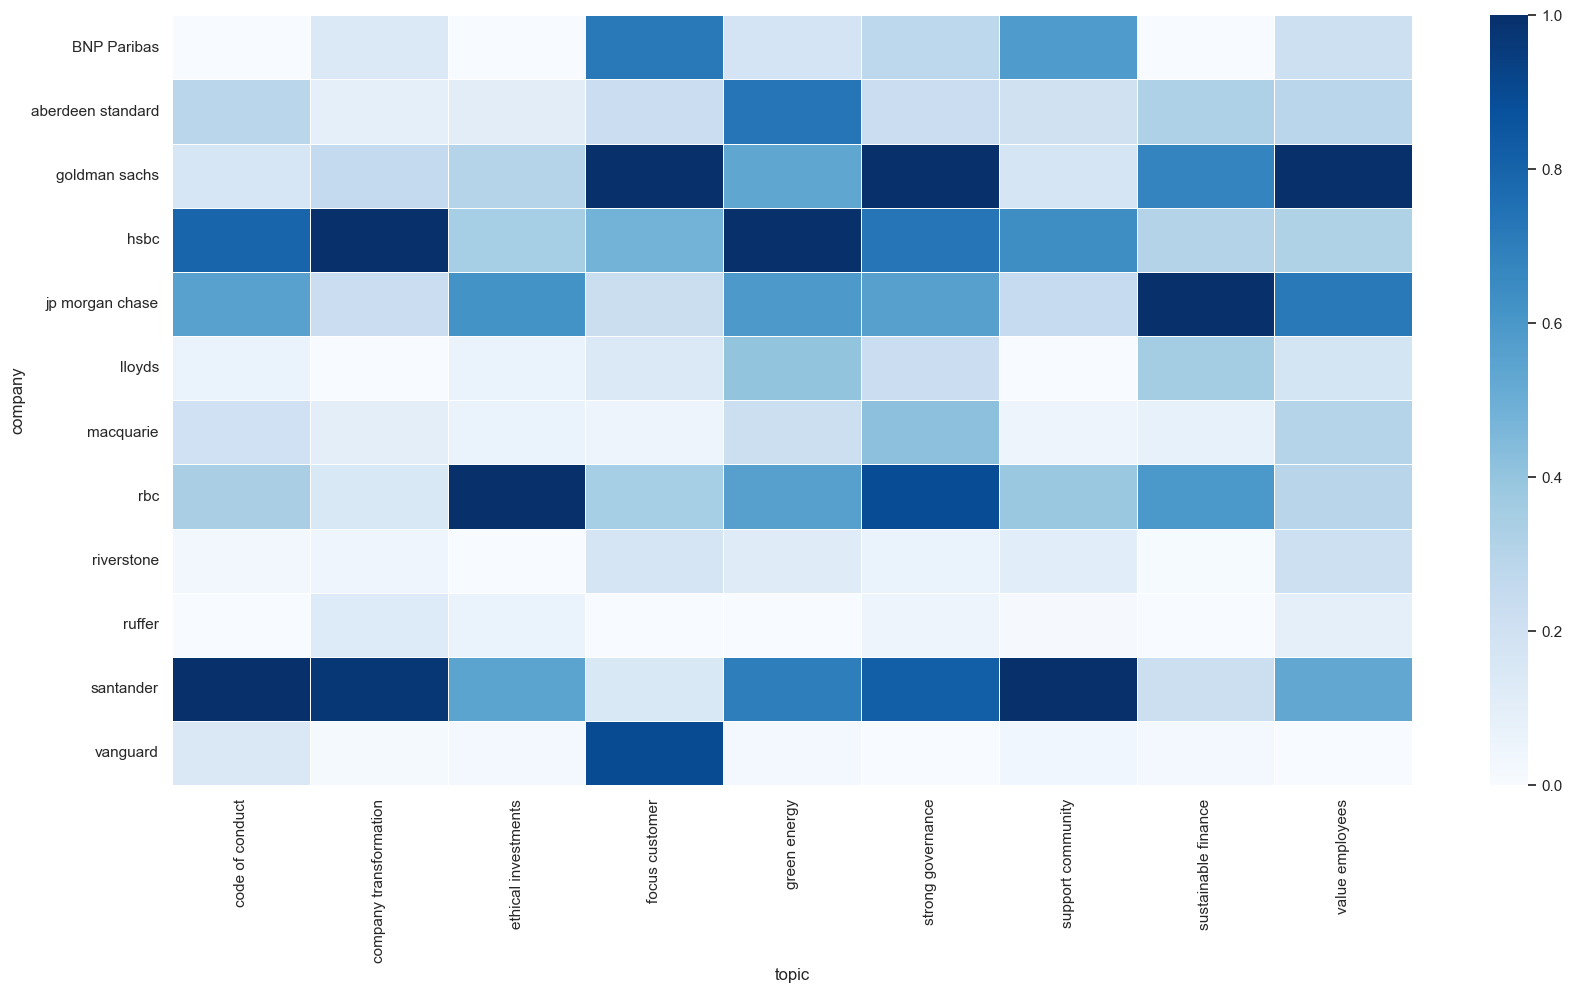

In [69]:
# plot heatmap, showing main area of focus for each FSI across topics we learned
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(esg_focus_norm, annot=False, linewidths=.5, cmap='Blues')
plt.show()

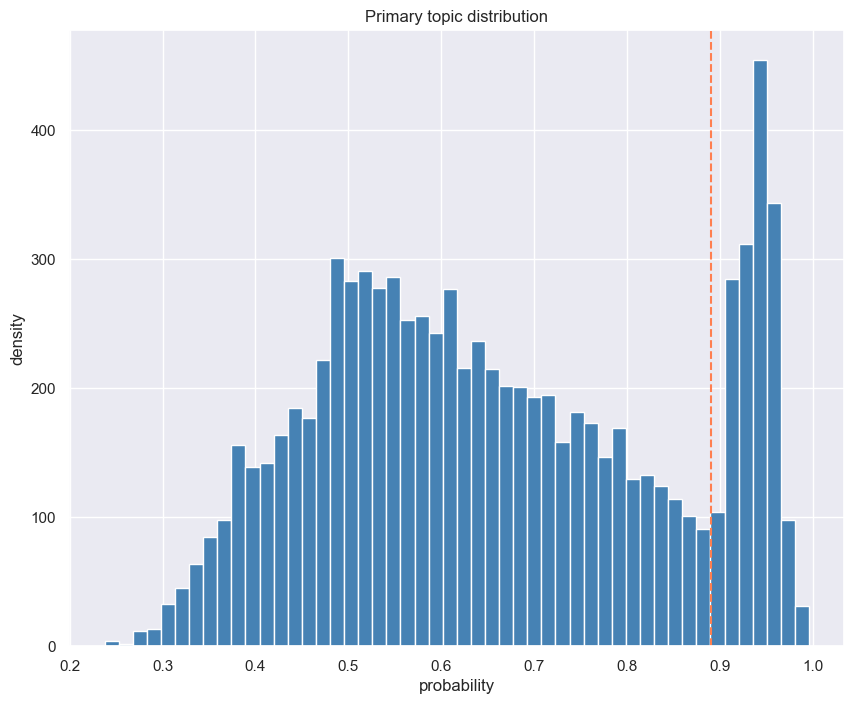

In [70]:
#Show distribution of topic probability

# not every statement follows a well defined topic

# some statements may be more generic and span across multiple themes

esg_group.probability.hist(bins=50, figsize=(10,8), color='steelblue')

# plot distribution of main topic proability
plt.axvline(0.89, color='coral', linestyle='--')
plt.title('Primary topic distribution')
plt.xlabel('probability')
plt.ylabel('density')
plt.show()

In [71]:
esg_group.probability

0       0.431434
1       0.355995
2       0.626462
3       0.430937
4       0.792273
          ...   
8614    0.763306
8615    0.473985
8616    0.947690
8617    0.888822
8618    0.351913
Name: probability, Length: 8619, dtype: float64

In [72]:
#Retrieve key statements for each topic

# extract statements relevant to a given topic

topic_discussions = esg_group[esg_group['topic'] == 'green energy']

# as specified in probability distribution, we want only specific topics and not general discussions
topic_discussions = topic_discussions[topic_discussions['probability'] > 0.89]

# access more specific topics first

topic_discussions = topic_discussions.sort_values('probability', ascending=False)

rows = [] 
for i, row in topic_discussions.iterrows():
  rows.append([row.company, row.probability, row.statements])

# display dataframe of statements for selected topic of interest
display(pd.DataFrame(rows, columns=['company', 'probability', 'statement']))

,company,probability,statement
0,jp morgan chase,0.973847,These legal proceedings are at varying stages ...
1,aberdeen standard,0.973843,"We are a signatory to the UN Global Compact, w..."
2,jp morgan chase,0.973055,These legal proceedings are at varying stages ...
3,hsbc,0.971310,Our June 2021 Snapshot survey revealed there a...
4,santander,0.969325,Our activities-combating financial crime Regul...
...,...,...,...
137,hsbc,0.901167,Results are shared across the Group to provide...
138,goldman sachs,0.901165,We plan to share further details in our second...
139,jp morgan chase,0.901157,"We know there is more work to do, and we are c..."
140,hsbc,0.899508,52 HSBC Holdings plc Annual Report and Account...


In [73]:
#STEP3: Key ESG initiatives
#identifier les declarations spécific à chaque entreprise à partir des proba de LDA en utilisant KMeans : clustering chaque declaration en fct de leur similitude

In [74]:
from sklearn.cluster import KMeans


In [75]:
#1 déterminier le nombre optimale des clusters K avec ELBOW METHOD

# we extract our probabilities distribution as input vectors for KMeans
X_train = list(esg_group.probabilities)

# nevertheless, we still want to ensure relavance of our clustering using the simple "elbow method"
# we capture the sum of squared distance of each point to their closest center for different values of k
wsses = []
for k in [5, 8, 10, 20, 30, 50, 80, 100]:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train)
  wsse = np.sum([np.min(x)**2 for x in kmeans.transform(X_train)]) 
  wsses.append([k, wsse])
  
#we simply plot the WSSE against K to find optimal K value
wsse_df = pd.DataFrame(wsses, columns=['k', 'wsse'])
display(wsse_df)



C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

,k,wsse
0,5,1688.349632
1,8,1016.130923
2,10,812.552961
3,20,571.278515
4,30,437.095825
5,50,290.837042
6,80,206.054502
7,100,177.207809


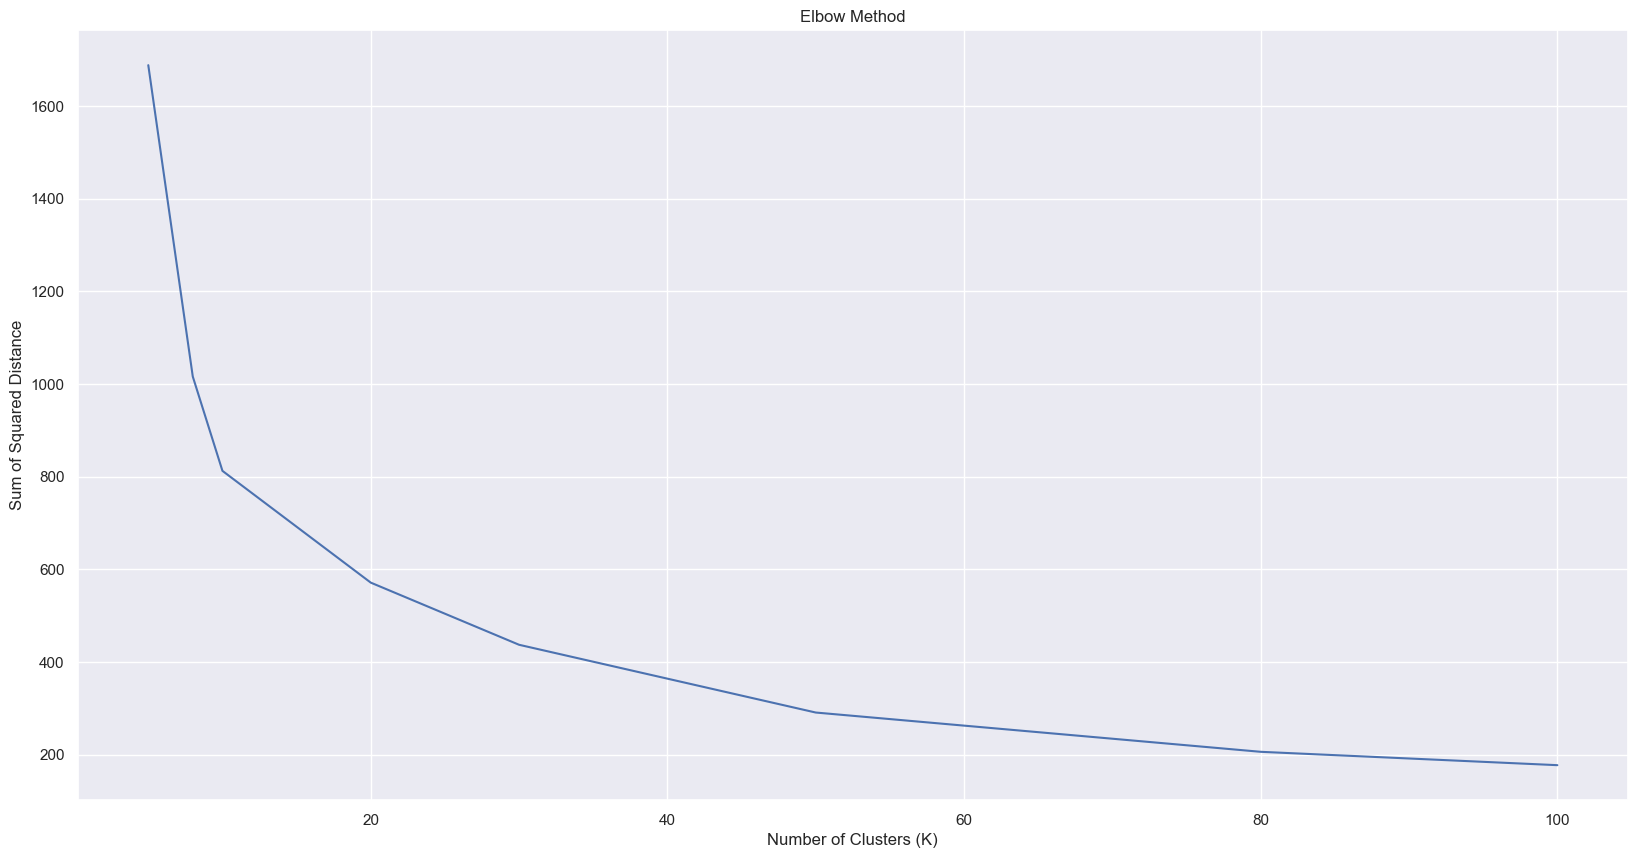

In [76]:
import matplotlib.pyplot as plt

# plot the WSSE against K to find optimal K value
plt.plot(wsse_df['k'], wsse_df['wsse'])
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distance')
plt.show()


In [77]:
# K is aroud 15 - 20 cluster

In [80]:
#mlflow.end_run()

In [82]:
#grouper les déclarations en clusters et déterminer la plus proche distance
# track experiment on MLflow
with mlflow.start_run(run_name='clustering'):
  
  # we train our KMeans model trained with the appropriate value for K
  kmeans = KMeans(n_clusters=20, random_state=42)
  kmeans.fit(X_train)
  
  # Log model 
  mlflow.sklearn.log_model(kmeans, "model")
  mlflow.log_param('n_clusters', '15')
  mlflow.log_metric('wsse', np.sum([np.min(x)**2 for x in kmeans.transform(X_train)]))
  
  # Retrieve experiment ID
  cluster_run_id = mlflow.active_run().info.run_id

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
# Assign statements to closest clusters
# find the minimum distance for each point to their closest cluster
y_dist = [np.min(x) for x in kmeans.transform(X_train)] #calcule la distance minimale entre chaque point
dist_df = pd.DataFrame(zip(y_dist), columns=['distance'])
esg_group_dist = pd.concat([esg_group, dist_df], axis=1)

In [84]:
esg_group_dist[['company', 'lemma', 'topic','probability','distance']]

,company,lemma,topic,probability,distance
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,support community,0.431434,0.244888
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,sustainable finance,0.355995,0.356593
2,jp morgan chase,"company like serve customer , client community...",sustainable finance,0.626462,0.273967
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...",strong governance,0.430937,0.379503
4,jp morgan chase,leverage expertise company support green futur...,sustainable finance,0.792273,0.138808
...,...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",ethical investments,0.763306,0.195579
8615,ruffer,"llp information provider , include limitation ...",ethical investments,0.473985,0.336718
8616,ruffer,"Parties express imply warranty kind , Parties ...",green energy,0.947690,0.233172
8617,ruffer,Parties shall liability error omission connect...,ethical investments,0.888822,0.259916


In [85]:

#esg_group_dist.to_csv('esg_reports.csv', index=False)


In [86]:
"""#Find companies specific ESG strategies
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('esg_reports.csv')

# Renommer les colonnes
df = df.rename(columns={'Company': 'company', 'Topic': 'topic', 'Statement': 'statements'})

# Convertir les colonnes pertinentes en minuscules
df['company'] = df['company'].str.lower()
df['topic'] = df['topic'].str.lower()
df['statement'] = df['statements'].str.lower()

# Trouver les entreprises avec des stratégies ESG spécifiques
df_ranked = df.groupby(['company', 'topic', 'statement'], as_index=False).agg({'probability': 'max', 'distance': 'min'})
df_ranked['rank'] = df_ranked.groupby(['company', 'topic'])['distance'].rank(method='dense', ascending=False)
df_filtered = df_ranked[(df_ranked['rank'] == 1) & (df_ranked['topic'] == 'green energy')]

# Trier les entreprises par ordre alphabétique
df_filtered = df_filtered.sort_values(['company', 'topic', 'rank'])

# Afficher le résultat
print(df_filtered[['company', 'topic', 'statement']])
"""

"#Find companies specific ESG strategies\nimport pandas as pd\n\n# Lire le fichier CSV\ndf = pd.read_csv('esg_reports.csv')\n\n# Renommer les colonnes\ndf = df.rename(columns={'Company': 'company', 'Topic': 'topic', 'Statement': 'statements'})\n\n# Convertir les colonnes pertinentes en minuscules\ndf['company'] = df['company'].str.lower()\ndf['topic'] = df['topic'].str.lower()\ndf['statement'] = df['statements'].str.lower()\n\n# Trouver les entreprises avec des stratégies ESG spécifiques\ndf_ranked = df.groupby(['company', 'topic', 'statement'], as_index=False).agg({'probability': 'max', 'distance': 'min'})\ndf_ranked['rank'] = df_ranked.groupby(['company', 'topic'])['distance'].rank(method='dense', ascending=False)\ndf_filtered = df_ranked[(df_ranked['rank'] == 1) & (df_ranked['topic'] == 'green energy')]\n\n# Trier les entreprises par ordre alphabétique\ndf_filtered = df_filtered.sort_values(['company', 'topic', 'rank'])\n\n# Afficher le résultat\nprint(df_filtered[['company', 'topic

In [87]:
"""import pandas as pd

# Lire le fichier CSV contenant les données
df = pd.read_csv('esg_reports.csv')

# Renommer les colonnes
df = df.rename(columns={'Company': 'company', 'Topic': 'topic', 'Statement': 'statements'})

# Convertir les colonnes pertinentes en minuscules
df['company'] = df['company'].str.lower()
df['topic'] = df['topic'].str.lower()
df['statements'] = df['statements'].str.lower()

# Appliquer le classement dense sur les déclarations de chaque entreprise et sujet
df['rank'] = df.groupby(['company', 'topic'])['probability'].rank(method='dense', ascending=False)

# Filtrer les déclarations avec un rang égal à 1 pour une entreprise donnée
company_name = 'rbc'
filtered_df = df[(df['company'] == company_name) & (df['rank'] == 1)]

# Afficher les déclarations spécifiques de tous les sujets pour l'entreprise donnée
print(filtered_df[['topic', 'statements']])
"""

"import pandas as pd\n\n# Lire le fichier CSV contenant les données\ndf = pd.read_csv('esg_reports.csv')\n\n# Renommer les colonnes\ndf = df.rename(columns={'Company': 'company', 'Topic': 'topic', 'Statement': 'statements'})\n\n# Convertir les colonnes pertinentes en minuscules\ndf['company'] = df['company'].str.lower()\ndf['topic'] = df['topic'].str.lower()\ndf['statements'] = df['statements'].str.lower()\n\n# Appliquer le classement dense sur les déclarations de chaque entreprise et sujet\ndf['rank'] = df.groupby(['company', 'topic'])['probability'].rank(method='dense', ascending=False)\n\n# Filtrer les déclarations avec un rang égal à 1 pour une entreprise donnée\ncompany_name = 'rbc'\nfiltered_df = df[(df['company'] == company_name) & (df['rank'] == 1)]\n\n# Afficher les déclarations spécifiques de tous les sujets pour l'entreprise donnée\nprint(filtered_df[['topic', 'statements']])\n"

In [88]:
"""result = filtered_df[['topic', 'statements']]
# Enregistrer le résultat dans un fichier CSV
result.to_csv('filtered_declarations.csv', index=False)
"""

"result = filtered_df[['topic', 'statements']]\n# Enregistrer le résultat dans un fichier CSV\nresult.to_csv('filtered_declarations.csv', index=False)\n"

In [89]:
!pip install spark

In [90]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("ESG Reports") \
    .getOrCreate()

# Rest of your code
spark.createDataFrame(esg_group_dist) \
    .write \
    .format("delta") \
    .saveAsTable("esg.reports")


TypeError: Unable to infer the type of the field probabilities.

In [91]:
from pyspark.sql.types import StructType, StructField, ArrayType, DoubleType

# Define the schema
schema = StructType([
    StructField("topic", DoubleType(), nullable=False),
    StructField("probabilities", ArrayType(DoubleType()), nullable=False)
])

# Create the DataFrame using the defined schema
df = spark.createDataFrame(esg_group_dist, schema)

# Write the DataFrame to Delta format and save as a table
df.write.format("delta").saveAsTable("esg.reports")


ValueError: Length of object (7) does not match with length of fields (2)